## Introduction:

In this scenario, I am tasked with analyzing the product (Meditation app) usage data to better understand the consumers, characterisitcs of app usage and its performance. 

### About the data:
  
  1. **Usage Data**: Contains information corresponding to the frequency of app usage across a 14 day period.
  <br>
  
  2. **User Experience Survey**: Contains user responses to particular survey questions before usage and after usage of the data.
  <br>
  Keys:
  
      a) X1 - I Expect this meditation app to be helpful. <br>
      b) X2 - It is easy for me to concentrate on what I am doing.<br>
      c) X3 - I am able to focus on the present moment.<br>
      d) X4 - I tend to easily stick to new habits.<br>
      e) X5 - I enjoy keeping a regular schedule.<br>
      f) X6 - Recently I have felt stress.<br>
      g) X7 - I found this meditation app to be helpful.<br>
     
     The ratings are on a scale of 1-7
   
   <br>
  3. **User Demographics**: Contains information such as age group, gender, and location of the user

In [1]:
#Import necessary packages for data analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

#Ignore basic warnings to avoid it from appearing in report
warnings.filterwarnings("ignore")


In [2]:
#Load the 3 datasets as Pandas Dataframes.
#UserId is the primary key identifier, therefore, can be used as index

#User Demographics Data
demographics = pd.read_excel('C:/Users/dell/Downloads/Demographics_-_Humu_case_study.xlsx',index_col = 'userid') 

#App Usage Data
app_usage =  pd.read_excel('C:/Users/dell/Downloads/App_usage_data_-_Humu_case_study.xlsx', index_col = 'userid') 

#User experience survey data
user_survey = pd.read_excel('C:/Users/dell/Downloads/User_experience_survey_-_Humu_case_study.xlsx', index_col = 'userid')  


In [3]:
#Look at what the dataframes look like.

In [4]:
demographics.head(5)  #Demographics data

,age_range,gender,metro_area
userid,,,
1,25 to 34,female,NYC
2,25 to 34,female,LA
3,45 to 54,female,SF
4,25 to 34,female,NYC
5,25 to 34,female,CHI


In [5]:
app_usage.head(5) #App Usage Frequency Data for 14 day period.

,day1,day2,day3,day4,day5,day6,day7,day8,day9,day10,day11,day12,day13,day14
userid,,,,,,,,,,,,,,
1,2,1,1,1,1,0,1,1,1,0,1.0,0.0,1.0,1.0
2,1,1,1,0,0,0,0,1,1,1,0.0,1.0,1.0,0.0
3,1,1,4,0,0,0,1,0,0,1,0.0,1.0,1.0,1.0
4,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,NaN
5,1,0,0,0,1,2,0,0,0,2,0.0,0.0,0.0,NaN


In [6]:
user_survey.head()  #Responses / Ratings from an user experience survey

,time,X1,X2,X3,X4,X5,X6,X7
userid,,,,,,,,
1,sign up,3.0,6.0,6.0,7.0,6.0,5,NaN
1,post-14 days,NaN,NaN,NaN,NaN,NaN,5,5.0
2,sign up,5.0,4.0,6.0,6.0,4.0,7,NaN
2,post-14 days,NaN,NaN,NaN,NaN,NaN,3,7.0
3,sign up,2.0,5.0,4.0,5.0,4.0,7,NaN


We notice that the user survey data consists of 2 ratings per user, one during signup for app, and one after 14 days. 
Let us split the data into 2 dataframes (sign up time and post 14 days time).



In [21]:
#Split the user survey data based on time of survey.

signup_time = user_survey[user_survey['time'] == 'sign up']   #Signup Time Survey Responses
signup_time.drop('time', axis = 1 , inplace= True)

In [22]:
post14_time = user_survey[user_survey['time'] ==  'post-14 days']  #Post 14 day time survey responses
post14_time.drop('time', axis = 1 , inplace= True) 


**What are the survey responses at signup time?**

In [23]:
signup_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 1 to 1865
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1865 non-null   float64
 1   X2      1865 non-null   float64
 2   X3      1865 non-null   float64
 3   X4      1865 non-null   float64
 4   X5      1865 non-null   float64
 5   X6      1865 non-null   int64  
 6   X7      0 non-null      float64
dtypes: float64(6), int64(1)
memory usage: 116.6 KB


X7 was never asked/answered during the sign up since it is about whether or not the meditation app was helpful. 

**What are the survey responses post 14 days of usage?**

In [10]:
post14_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 1 to 935
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X2      0 non-null      float64
 2   X3      0 non-null      float64
 3   X4      0 non-null      float64
 4   X5      0 non-null      float64
 5   X6      935 non-null    int64  
 6   X7      935 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 58.4 KB


X1, X2, X3, X4,X5 were asked/answered in the survey after the 14 day period. Therefore, we can conclude that the first 5 responses were to understand the user.

X6 is used to measure the stress levels before and after using the app to validate performance.

X7 measures the usefulness of the app according to the user.

** Another important thing is to note that there are only 935 users who have have responded to both the surveys.** 

## Data Cleaning: 

At sign up, only 6 responses are required which are used to better undestand, therefore, we can drop the last response which is used to measure and get feedback on the app. Similarly, the survey post 14 days contains responses regarding the performance of the app. Therefore, drop the remaining in this data frame. 



In [11]:
#Drop X7 from sign up time responses since users can't rate how helpful the app is before using it.

signup_time.drop('X7', axis = 1 , inplace= True)

In [12]:
#Lets rename the response / rating columns to be friendly to read in the dataframes.

signup_time.columns = ['App - Helpfulness Expectation', 'Current Concentration Level', 'Focus on Present Moment',
                      'Sticking to new Habits','Keeping a Regular Schedule','Before App Usage Stress Level']



In [13]:
#Drop the response columns which were presented to the user only during sign-up
post14_time.drop(['X1','X2','X3','X4','X5'], axis = 1 , inplace = True)

In [14]:
#Rename post 14 day survey response column.

post14_time.columns = ['After App Usage Stress Levels','App Helpfulness Rating']

**Join all dataframes on the user id column**

In [15]:
#Join all dataframes into one

data = demographics.join([app_usage,signup_time,post14_time])

In [16]:
data.head(5)

,age_range,gender,metro_area,day1,day2,day3,day4,day5,day6,day7,...,day13,day14,App - Helpfulness Expectation,Current Concentration Level,Focus on Present Moment,Sticking to new Habits,Keeping a Regular Schedule,Before App Usage Stress Level,After App Usage Stress Levels,App Helpfulness Rating
userid,,,,,,,,,,,,,,,,,,,,,
1,25 to 34,female,NYC,2,1,1,1,1,0,1,...,1.0,1.0,3.0,6.0,6.0,7.0,6.0,5.0,5.0,5.0
2,25 to 34,female,LA,1,1,1,0,0,0,0,...,1.0,0.0,5.0,4.0,6.0,6.0,4.0,7.0,3.0,7.0
3,45 to 54,female,SF,1,1,4,0,0,0,1,...,1.0,1.0,2.0,5.0,4.0,5.0,4.0,7.0,4.0,6.0
4,25 to 34,female,NYC,0,0,0,0,0,0,0,...,NaN,NaN,1.0,4.0,4.0,6.0,7.0,5.0,5.0,4.0
5,25 to 34,female,CHI,1,0,0,0,1,2,0,...,0.0,NaN,3.0,5.0,4.0,5.0,3.0,4.0,7.0,7.0


### IMPORTANT ASSUMPTION

The app usage data  contains missing information for some users. Therefore, assuming the usage pattern is similar across the entire sample,  I will fill these values with the mode (highest frequency) of the column values.

Survey responses are missing for a lot of users. However, imputing missing values for these can introduce a lot of bias since behaviors/responses are dependent on so many factors. Therefore, I will not be filling these missing values and providing analysis with the sample of the people who have given the survey response.

In [17]:
#Fill missing values for the app usage with the mode of the column values.

usage_day = ['day1','day2','day3','day4','day5','day6','day7','day8','day9','day10','day11','day12','day13','day14']

for i in usage_day:
    data[i].fillna(data[i].mode()[0], inplace = True)

In [18]:
#The response in the surveys are categories on a scale of 1-7. Therefore, convert the categories. 
#Demographic information such as age range and gender are also categorical.

response_survey = ['App - Helpfulness Expectation','Current Concentration Level', 'Focus on Present Moment',
                   'Sticking to new Habits', 'Keeping a Regular Schedule','Before App Usage Stress Level', 'After App Usage Stress Levels',
                   'App Helpfulness Rating','age_range','gender']

for i in response_survey:
    data[i] = data[i].astype('category')

In [19]:
#Understand the usage pattern of data (Descriptive Statistics of Numerical Values)
data.describe()

,day1,day2,day3,day4,day5,day6,day7,day8,day9,day10,day11,day12,day13,day14
count,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000
mean,0.654159,0.689583,0.625295,0.670428,0.664917,0.654421,0.638678,0.650485,0.605615,0.614274,0.443453,0.415114,0.405405,0.385726
std,0.953813,0.953207,0.910845,0.943559,0.926300,0.926126,0.960022,0.932421,0.912186,0.926567,0.846572,0.806029,0.779772,0.788531
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,6.000000,6.000000,7.000000,6.000000,6.000000,6.000000,7.000000,5.000000,5.000000,5.000000,7.000000,6.000000,6.000000,5.000000


## Analysis

### Are there any distinct types of users of this app?

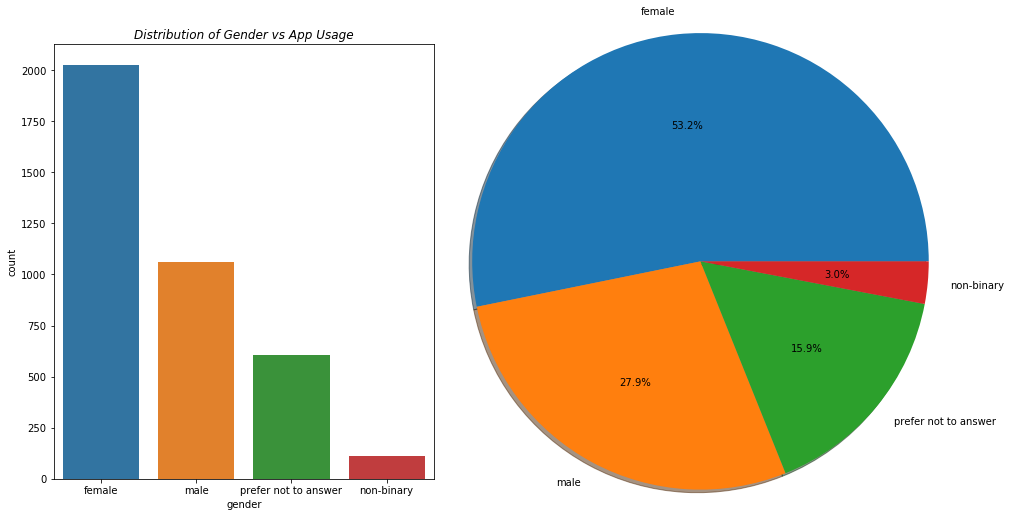

In [30]:
# Gender vs App Usage

gender_values = data['gender'].value_counts().tolist()
gender_labels = data['gender'].value_counts().index.tolist()
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.title("Distribution of Gender vs App Usage", loc ="center", fontstyle = "italic")

sns.countplot('gender', data = data, order = data['gender'].value_counts().index ) 
plt.subplot(1,2,2)
plt.axis("equal")
plt.pie(gender_values, labels =  gender_labels, radius = 1.5, autopct='%0.1f%%',shadow=True)
plt.show()

**From the product usage data, it is evident that the females are the primary users/consumers of Serenely's meditation app. Despite 15.9% of the users not opting to share their gender, from the data we see that 53.2% of the users are females. They are the major profiles of our consumer segment. This indicates that women are much more likely than men to subscribe to a meditation app for their well being.**

<b><u>Recommendation:</u></b> Target this segment primarily in marketing and development to better understand the user journey. 



Text(0.5, 1.0, 'Distribution of Age Range vs App Usage')

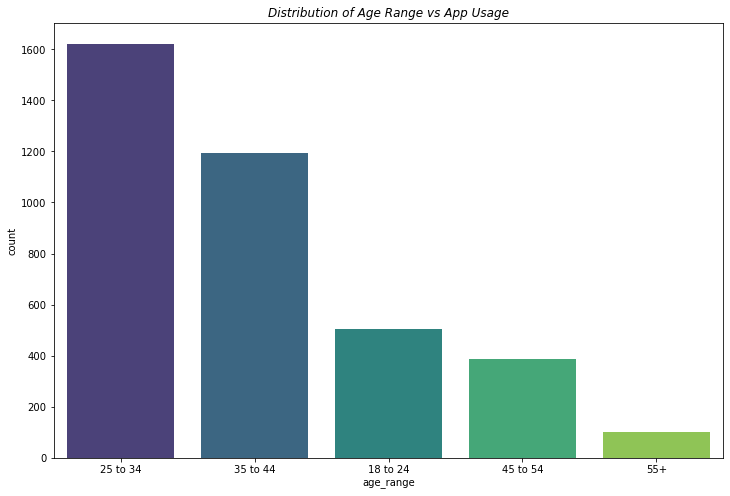

In [31]:
# Age-range vs App Usage
plt.figure(figsize = (12,8))
sns.countplot('age_range', data = data, order = data['age_range'].value_counts().index, palette = 'viridis')
plt.title("Distribution of Age Range vs App Usage", loc ="center", fontstyle = "italic")

**Majority (73.5 %) of our users belong to the age group between 25-44. This indicates that adults who are in their early and middle stages of their careers are our primary users. This could be due to the extreme stress levels and pressure at work/family, the need for better well being which could ultimately lead to better performances in balancing multiple aspects of life, etc.  The target audience is being reached.**

**It is also vital to note that much older adults (55 years +) contribute to less than 7% of our consumer segment.**

 

Text(0.5, 1.0, 'Distribution of User Location')

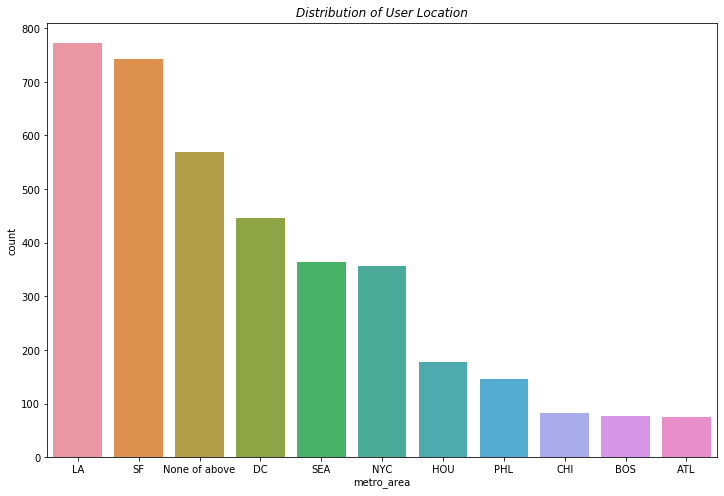

In [32]:
#Where are our customers located?

plt.figure(figsize = (12,8))
sns.countplot('metro_area', data = data, order = data['metro_area'].value_counts().index)
plt.title("Distribution of User Location", loc ="center", fontstyle = "italic")


**People living in California are our primary users. Our app does not seem to be reaching the audience well in the major hubs in the East Coast. This could be due to a lot of unexplainable reasons but lifestyle and culture of people across different states in the country potentially is a driving factor.**

<b><u>Recommendation:</u></b> Understand behavior and lifestyle of those outside California better to have a wider audience reach in the country. 

### What personal characteristics are driving app usage?

In [25]:
# Any particular behavior trait or characteristic the reason behing people using the app? 

Text(0.5, 1.0, 'Distribution of Stress Levels and Corresponding Age Range')

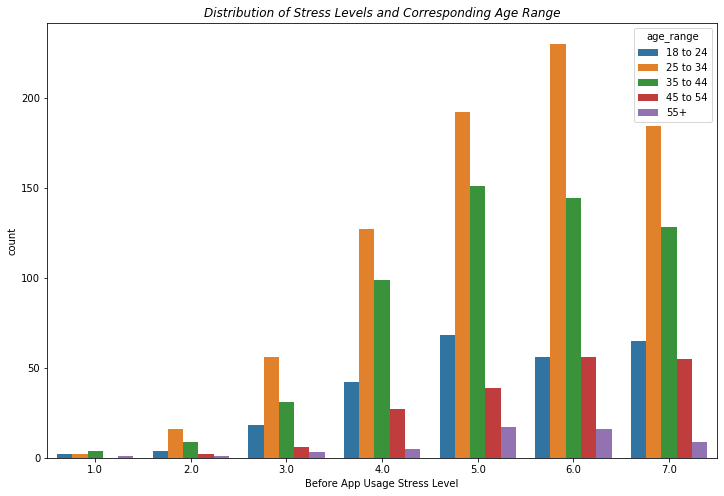

In [33]:
#Looking at who have recently felt stressed?
plt.figure(figsize = (12,8))
sns.countplot('Before App Usage Stress Level', data = data, hue = 'age_range')
plt.title("Distribution of Stress Levels and Corresponding Age Range", loc ="center", fontstyle = "italic")

**As expected, and as per the prior analysis, those who are relatively in their early adulthood and early stages of their career report they have recently felt high levels of stress in their lives. People intend to relive stress by using the meditation app.** 

<b><u>Assumption:</u></b>

Categorizing the survey response rating as follows:<br>
a) Value < 3 = Low<br>
b) Value >=3 and <=6 as Average <br>
c) Value > 6 = High <br>

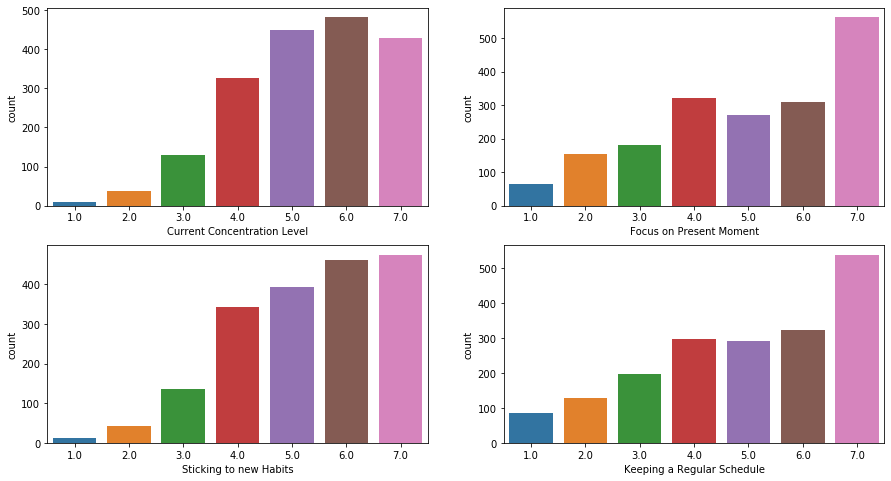

In [27]:
#Lets look at the distribution of other behavioral characteristics of users as reported by them
plt.figure(figsize = (15,8))
plt.subplot(2,2,1)
sns.countplot('Current Concentration Level', data = data) # Response for ease of concentration
plt.subplot(2,2,2)
sns.countplot('Focus on Present Moment', data = data) #Response for ability to focus on present moment
plt.subplot(2,2,3)
sns.countplot('Sticking to new Habits', data = data) #Response for tendency to stick to new habits
plt.subplot(2,2,4)
sns.countplot('Keeping a Regular Schedule', data = data)# Response for enjoying keeping a regular schedule

**From the above plots it is easy to notice that the majority (approximately 75%) of our users have reported that they have average or below average levels of: <br>**

**-Concentration (Unable to concentrate on what they are doing)**<br>

**-Focus (Easily distracted (Future or past) and unable to focus on the present moment)**<br>

**-Ability to avoid new habits (They are easily glued to new habits which is circumstancial)**<br>

**-Keeping a regular schedule (No enjoyment in keeping a fixed schedule)** <br>

These are the major behavorial characteristics of our users

In [116]:
#Putting the above visuals into numbers

#How many report it is extremely easy for them to concentrate on what they are doing?
good_concentration = len(data[(data['Current Concentration Level'] == 6.0) | (data['Current Concentration Level'] == 7.0)])

#Ratio of people having good concentration
print('Ratio of people who report it is extremely easy for them to concentrate are:' +
      str(round(good_concentration / len(data['Current Concentration Level']) * 100,2)) +"%" ) 

#How many report they greatly tend to stick to new habits easily
new_habits = len(data[(data['Sticking to new Habits'] == 6.0) | (data['Sticking to new Habits'] == 7.0)])

#Ratio of people reporting high tendency to stick to new habits
print('Ratio of people who report it is extremely easy for them to stick to new habits are:' +
      str(round(new_habits / len(data['Sticking to new Habits']) * 100,2)) +"%" ) 

#How many report they highly enjoy keeping a regular schdule
regular_schedule = len(data[(data['Keeping a Regular Schedule'] == 6.0) | (data['Keeping a Regular Schedule'] == 7.0)])

#Ratio of people who highly enjoy keeping a regular schedule
print('Ratio of people who report they greatly enjoy keeping a regular schedule are:' +
      str(round(regular_schedule / len(data['Keeping a Regular Schedule']) * 100,2)) +"%" ) 

#How many report they can easily focus on the present moment
focus_present = len(data[(data['Focus on Present Moment'] == 6.0) | (data['Focus on Present Moment'] == 7.0)])

#Ratio of people who easily focus on the present moment
print('Ratio of people who report they are easily able to focus on the present are:' +
      str(round(focus_present / len(data['Focus on Present Moment']) * 100,2)) +"%" ) 

Ratio of people who report it is extremely easy for them to concentrate are:23.93%
Ratio of people who report it is extremely easy for them to stick to new habits are:24.59%
Ratio of people who report they greatly enjoy keeping a regular schedule are:22.67%
Ratio of people who report they are easily able to focus on the present are:22.88%


### Interesting patterns in the data. Causes for concern?

Text(0.5, 1.0, 'Average App Usage Trend - 14 days')

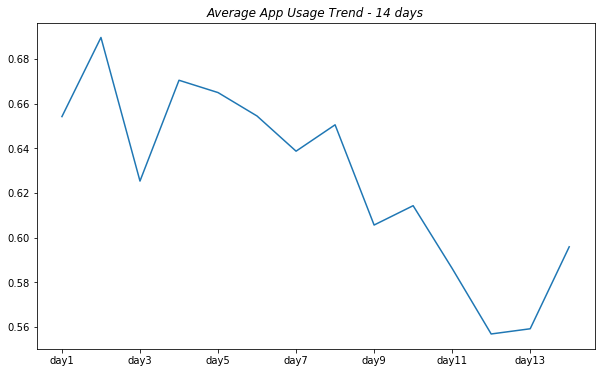

In [34]:
#Average trend in daily app usage across 14 days
plt.figure(figsize  = (10,6))
app_usage.mean(axis = 0).plot(kind = 'line', )
plt.title("Average App Usage Trend - 14 days", loc ="center", fontstyle = "italic")

**While the difference in average app usage value across all users for 14 days may not seem significant in terms of numerical value, there are some interesting patterns. The average usage seem to be fluctuating for the first week. The key trend we notice is the significant drop in app usage after Day 8. This could be due to a lot of reasons which cannot be explained just by looking at the data at hand. This is a cause for concern.**.

<br>
<u>**Business Recommendations:**</u> Send personalized nudges or notifications to remind users to use the app to relieve stress. This could be in the mornings, late evenings after work, or even during work suggesting them to take a breather.  <br>

Since the app usage seem to drop off after the first week, the product manager should consider the following: <br>

a) Gamification: Encourage people to go on a streak. The app could award specific titles to reward people for continuing their streak beyond the first week. Consider using intangible rewards, such as reputations. 
Example titles: Learner -> Intermediate -> Guru etc.

b) Triggering push notifications, in app notifications, and emails to users to continue their streak especially around the end of first week. 

c) Encourage social sharing/referral: Since we should be targeting a specific consumer segment, consider devising strategies to intoduce virality within their social circle. Ex: Incentives, reputation, levels etc.

d) Target audiences using influencers who have great views on health and mental wellness.

e) Further monitor metrics such as DAU (Daily Active User), WAU (Weekly active user), churn rate, conversion etc. to make better data-driven decisions in the future. 



<b><u>Are users finding the app helpful?</u></b>

**Note: Only 935 users have completed the response for the post 14 days survey. Therefore, we can compare performances of only these users who have submitted responses for both during signup time and after 14 days.** 



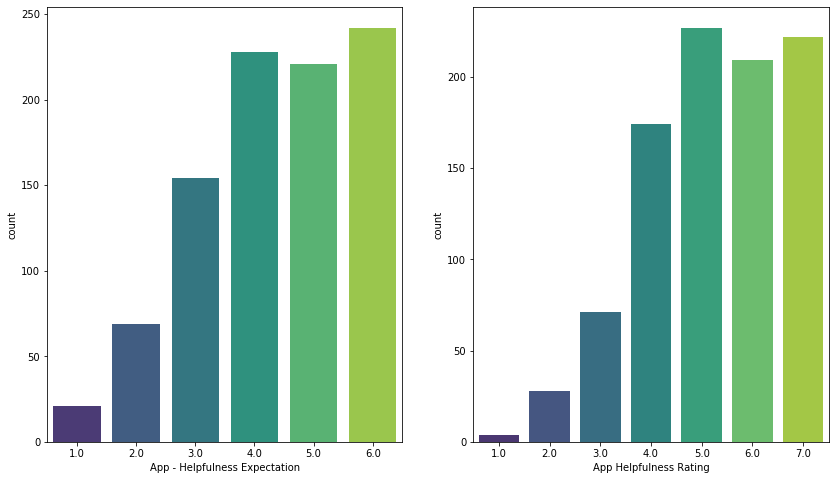

In [37]:
#Get users who have submitted responses at both times.
performance_app = data.iloc[:935]

#Lets look at the performance of the app by looking at how helpful the app has been? Is it meeting user expectation?

plt.figure(figsize = (14,8))
plt.subplot(1,2,1)
sns.countplot('App - Helpfulness Expectation', data = performance_app, palette = 'viridis', )
plt.subplot(1,2,2)
sns.countplot('App Helpfulness Rating', data = performance_app, palette = 'viridis')



In [187]:
#Frequency of Ratings - Helpfulness (Sign Up Time and Post 14 days)
helpfulness_before = pd.DataFrame(performance_app['App - Helpfulness Expectation'].value_counts())
helpfulness_after = pd.DataFrame(performance_app['App Helpfulness Rating'].value_counts())
helpfulness = pd.concat([helpfulness_before, helpfulness_after], axis = 1)
helpfulness.columns = ['Helpfulness Expectation', 'Post 14 Days Helpfulness Rating ']
helpfulness

,Helpfulness Expectation,Post 14 Days Helpfulness Rating
1.0,21.0,4
2.0,69.0,28
3.0,154.0,71
4.0,228.0,174
5.0,221.0,227
6.0,242.0,209
7.0,NaN,222


**From the above visual, we can certainly see that performance of the app is great by comparing the count of the ratings during sign up and after 14 days. The app has tremendously met the helpfulness expectation. This is a great sign for Serenely that most users are finding the product to be helpful in such a short period of time**

**The ratings frequency table above also validates the analysis.**

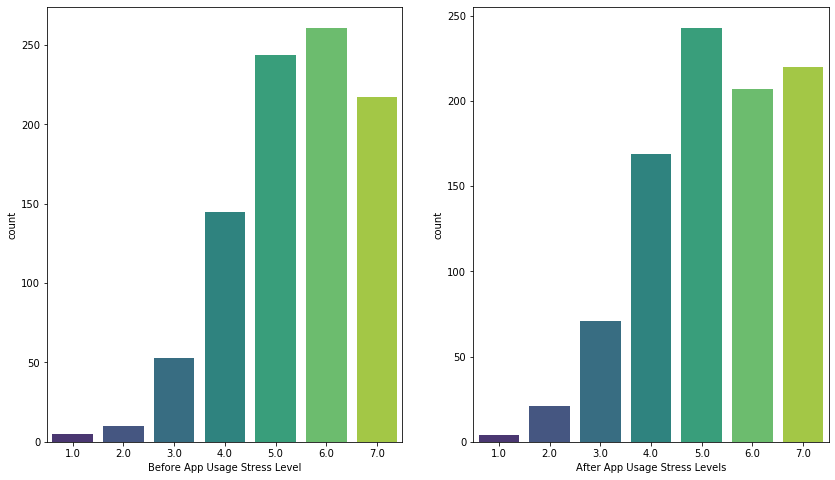

In [190]:
#Now letscompare the stress levels of users during sign up and post 14 days

plt.figure(figsize = (14,8))
plt.subplot(1,2,1)
sns.countplot('Before App Usage Stress Level', data = performance_app, palette = 'viridis', )
plt.subplot(1,2,2)
sns.countplot('After App Usage Stress Levels', data = performance_app, palette = 'viridis')

In [192]:
#Frequency of Ratings - Stress Levels (Sign Up Time and Post 14 days)
stresslevel_before = pd.DataFrame(performance_app['Before App Usage Stress Level'].value_counts())
stresslevel_after = pd.DataFrame(performance_app['After App Usage Stress Levels'].value_counts())
stress = pd.concat([stresslevel_before, stresslevel_after], axis = 1)
stress

,Before App Usage Stress Level,After App Usage Stress Levels
1.0,5,4
2.0,10,21
3.0,53,71
4.0,145,169
5.0,244,243
6.0,261,207
7.0,217,220


**Looking at the visuals and the table, though majority of our users find the app to be helpful, it is important to note that many users report increased levels of stress even after using the app for 14 days. A small margin of users report lower stress levels. This is once again a cause for concern and can be looked at an user-level view in more detail to help understand problems and answer questions.** 

## Conclusion

**Based on the initial analysis looking at the data for an extremely short period of time, the following are the notbale key conclusions in better understanding the product and its users:** <br>

**a) Over 53% of our consumer segment are females (from the data we have, including those who chose to not report gender). Most of the users belong to ages between 25 and 45, who potentiallly are in the early and middle stages of their careers.**

**b) A lot of our users belong to the west coast, particularly the major cities of California (LA and SF). Cities in the east coast contribute less. This could be due to differences in lifestyle, and culture of the cities.**

**c) About 75% of the users report poor levels of concentration, focus, ability to avoid new habits, and are looking for improvement in their behavioral characteristics, and also reduce stress.**

**d) On average, most of our users found the app to excede their expectations of the product to be helpful. However, the average decrease in app-usage trend across the two week period, and unchanged or increased report of recent stress experienced is a cause of concern and should be looked at closely.**